In [1]:
import pytesseract

In [2]:
import cv2 # pip install opencv-python

In [3]:
import matplotlib. pyplot as plt ## pip install matplotlib

# for configuration

In [4]:
In [4]: pytesseract.pytesseract. tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [5]:
img = cv2.imread('images/random4.png')

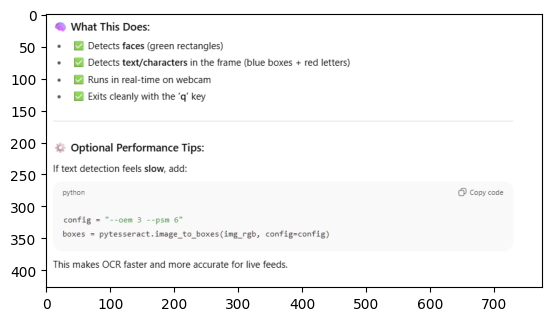

In [6]:
plt.imshow(img)

In [7]:
img2char = pytesseract.image_to_string(img)

In [8]:
print (img2char)

‘® What This Does:

. Detects faces (green rectangles)

. Detects text/characters in the frame (blue boxes + red letters)

. Runs in real-time on webcam
+ @ Exits cleanly with the ‘q’ key

© Optional Performance Tip:

If text detection feels slow, add:

python

config = "--oem 3 --psm 6"

boxes = pytesseract.image_to_boxes(img_rgb, confi;

This makes OCR faster and more accurate for live feeds.

Copy code



In [9]:
imgbox = pytesseract.image_to_boxes(img)

In [10]:
img_with_boxes = img.copy()


In [11]:
type(imgbox)

str

In [12]:
print(imgbox)

‘ 14 399 17 414 0
® 14 399 31 414 0
W 39 401 47 414 0
h 39 401 55 413 0
a 56 401 64 414 0
t 65 401 79 413 0
T 85 401 93 413 0
h 90 401 97 414 0
i 95 401 103 414 0
s 105 401 115 414 0
D 121 401 131 413 0
o 132 401 141 410 0
e 137 401 147 413 0
s 143 401 151 410 0
: 152 401 162 410 0
. 18 374 23 379 0
D 67 372 75 383 0
e 72 372 80 383 0
t 77 372 89 382 0
e 90 372 96 380 0
c 97 372 103 380 0
t 101 372 107 383 0
s 104 372 115 382 0
f 120 372 125 383 0
a 125 372 131 380 0
c 133 372 139 380 0
e 140 372 147 380 0
s 148 372 154 380 0
( 159 370 162 383 0
g 163 369 170 380 0
r 172 372 177 380 0
e 177 372 184 380 0
e 185 372 192 380 0
n 193 372 200 380 0
r 206 372 210 380 0
e 211 372 217 380 0
c 219 372 224 380 0
t 225 372 230 382 0
a 231 372 237 380 0
n 239 372 245 380 0
g 247 369 254 380 0
l 256 372 257 383 0
e 259 372 266 380 0
s 267 372 272 380 0
) 273 370 276 383 0
. 18 348 23 353 0
D 67 346 75 357 0
e 72 346 79 357 0
t 77 346 89 356 0
e 90 346 96 354 0
c 97 346 103 354 0
t 104 346 109 356 0

In [13]:
imgH, imgW,_ = img. shape

In [14]:
img. shape

(427, 776, 3)

In [15]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x, y, w, h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    
    # Convert Tesseract coordinates (bottom-left origin) to OpenCV (top-left origin)
    y_top = imgH - h
    y_bottom = imgH - y
    
    # Draw rectangle for each character (THIS MUST BE INSIDE THE LOOP)
    cv2.rectangle(img_with_boxes, (x, y_top), (w, y_bottom), (0, 0, 255), 1)

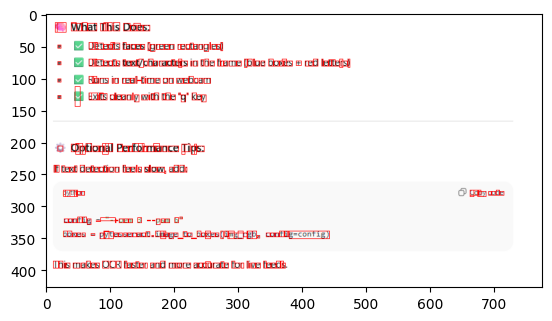

In [16]:
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.show()

# video demo

In [ ]:
import cv2
import pytesseract

# Initialize video capture from local file
cap = cv2.VideoCapture('images/video1.mp4')  # Replace with your video path

font = cv2.FONT_HERSHEY_SIMPLEX

# (Optional) Set up pytesseract path if needed on Windows
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # ---- OCR (Text Detection) ----
    # Convert frame to RGB (for pytesseract)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Get character boxes from pytesseract
    boxes = pytesseract.image_to_boxes(img_rgb)
    h_img, w_img, _ = img_rgb.shape
    
    for b in boxes.splitlines():
        b = b.split()
        if len(b) == 6:  # format check: char, x1, y1, x2, y2, page
            char, x1, y1, x2, y2 = b[0], int(b[1]), int(b[2]), int(b[3]), int(b[4])
            y1_new = h_img - y1
            y2_new = h_img - y2
            cv2.rectangle(frame, (x1, y2_new), (x2, y1_new), (255, 0, 0), 1)
            cv2.putText(frame, char, (x1, y2_new - 5), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('Text Detection from Video', frame)
    
    # Exit on 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# for webcam

In [ ]:
import cv2
import pytesseract

# Initialize video capture (0 for default webcam)
cap = cv2.VideoCapture(0)

font = cv2.FONT_HERSHEY_SIMPLEX

# (Optional) Set up pytesseract path if needed on Windows
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # ---- OCR (Text Detection) ----
    # Convert frame to RGB (for pytesseract)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Get character boxes from pytesseract
    boxes = pytesseract.image_to_boxes(img_rgb)
    h_img, w_img, _ = img_rgb.shape
    
    for b in boxes.splitlines():
        b = b.split()
        if len(b) == 6:  # format check: char, x1, y1, x2, y2, page
            char, x1, y1, x2, y2 = b[0], int(b[1]), int(b[2]), int(b[3]), int(b[4])
            y1_new = h_img - y1
            y2_new = h_img - y2
            cv2.rectangle(frame, (x1, y2_new), (x2, y1_new), (255, 0, 0), 1)
            cv2.putText(frame, char, (x1, y2_new - 5), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('Text Detection from Webcam', frame)
    
    # Exit on 'q'
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()